<a href="https://colab.research.google.com/github/Camilojaravila/202310_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/blob/main/Laboratorio%204/Sesion%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

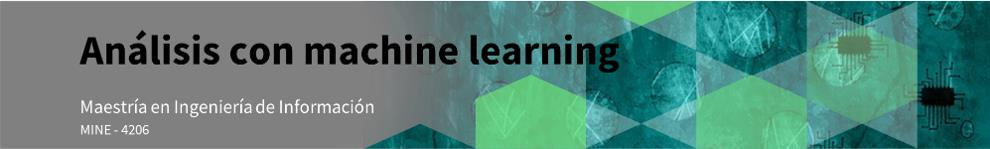

El conjunto de datos "Healthy Lifestyle Cities Report 2021" ofrece un análisis comparativo de las principales ciudades del mundo en términos de adopción de estilos de vida saludables. El propósito principal de este estudio es proporcionar información valiosa para investigadores, formuladores de políticas y ciudadanos interesados en examinar el impacto de los factores ambientales y socioeconómicos en la promoción de estilos de vida saludables en entornos urbanos. El conjunto de datos incluye diversas métricas relacionadas con la calidad del aire, áreas verdes, calidad del agua potable, disponibilidad de alimentos saludables, accesibilidad a gimnasios y centros de fitness, prevalencia de enfermedades, índice de obesidad e índice de felicidad, entre otros indicadores. Estos factores se combinan para generar una puntuación general que determina el ranking de las ciudades en función de su adopción de estilos de vida saludables.

El análisis de este conjunto de datos es esencial para comprender cómo las políticas públicas, la infraestructura y los servicios en las ciudades pueden influir en la salud y el bienestar de los residentes. Además, puede ser útil para aquellos que buscan reubicarse en una ciudad que fomente un estilo de vida saludable. Investigadores y académicos pueden emplear este conjunto de datos para llevar a cabo estudios más profundos, como determinar qué factores son más relevantes para la adopción de estilos de vida saludables o identificar estrategias de mejora para ciudades con calificaciones inferiores en términos de promoción de la salud.


## Objetivos

*   Realizar el entrenamiento de un modelo no supervisado.
*   Interpretar los resultados de un modelo de agrupación.
*   Extraer información de características basadas en datos.



## 0. Importación de Librerías
Para la transformación de los datos, así como para el entrenamiento de los modelos y la visualización de los resultados, se importan las siguientes librerías:

In [ ]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 38.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=9847df7beced8d291d91843d279b8204d50424419572f27d15d2fbad93074a6d
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d3

In [ ]:
import pandas as pd
import numpy as np
import sys
import os
import os.path as osp

from ydata_profiling import ProfileReport

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## 1. Perfilamiento y entendimiento de los datos


#### Lectura de los datos
Realizamos la carga de nuestros datos y realizamos un análisis de los datos que nos proporciona el negocio.

In [123]:
url = 'https://raw.githubusercontent.com/Camilojaravila/202310_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/main/Laboratorio%204/healthy_lifestyle_city_2021.csv'
datos = pd.read_csv(url)

datos

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


Realizaremos un análisis de los datos generales.

In [ ]:
ProfileReport(datos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Preprocesamiento de los Datos

Dado que vamos a utilizar un algoritmo el cuál solo entiende de datos numéricos, y realizando el análisis exploratorio del mismo. Podemos concluir que nuestras variables pueden ser transformados a variables numéricas de manera directa. Para ello, vamos a realizar una pequeña transformación de cada una de las columnas.

In [110]:
X_trans = datos.drop(['City', 'Rank'], axis = 1)
X_trans = X_trans.replace('-',0)
X_trans['Cost of a bottle of water(City)'] = X_trans['Cost of a bottle of water(City)'].str.replace('£', '')
X_trans['Obesity levels(Country)'] = X_trans['Obesity levels(Country)'].str.replace('%', '')
X_trans['Cost of a monthly gym membership(City)'] = X_trans['Cost of a monthly gym membership(City)'].str.replace('£', '')

X_trans

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,1858,1.92,20.40,81.2,30.93,1434,7.44,422,1048,34.90
1,2636,1.48,29.00,82.1,26.86,1712,7.22,406,1103,41.66
2,1884,1.94,20.10,81.0,17.33,1501,7.29,132,1008,25.74
3,1821,1.72,20.60,81.8,19.63,1452,7.35,129,598,37.31
4,1630,2.19,19.70,79.8,21.24,1380,7.64,154,523,32.53
5,1662,1.60,22.20,80.4,13.08,1540,7.80,113,309,35.23
6,2769,0.78,4.30,83.2,0,1644,5.87,35,539,55.87
7,1626,1.55,22.30,80.6,39.41,1386,7.07,254,1729,26.11
8,2591,1.19,23.80,82.2,65.19,1686,6.40,585,2344,37.80
9,1938,1.08,29.40,81.7,24.26,1670,7.23,218,788,31.04


### Modelamiento

Para cumplir el primer objetivo, utilizamos un aprendizaje no supervisado, ya que lo que queremos es obtener las carqacterísticas que resumen los datos. En este caso se puede utilizar el algoritmo de K-Means.

Sin embargo, para que nuestro algoritmo pueda funcionar, necesitamos definirle cuál va a ser la cantidad de grupos que va a ejecutar. Además, K-Means es muy sensible a las condiciones iniciales...

In [ ]:
def buscar_modelo(k, semilla):
    print(f"Entrenando el modelo con k={k} y semilla={semilla}.")
    model = KMeans(n_clusters=k,random_state=semilla, init='random', n_init=1)
    model.fit(X_trans)

    return model.inertia_

Para eso, evaluaremos diferentes semillas y diferentes grupos para poder evidenciar la diferencia de los modelos construidos.

In [ ]:
candidatos = [9,22,33,42,50]
grupos = range(2,10)
distorsions = dict()

for semilla in candidatos:
    distorsions[semilla] = list()
    for k in grupos:
        inertia = buscar_modelo(k, semilla)
        distorsions[semilla].append(inertia)
        print("Score:",inertia)
        print('-'*50)

Entrenando el modelo con k=2 y semilla=9.
Score: 66797285.7831219
--------------------------------------------------
Entrenando el modelo con k=3 y semilla=9.
Score: 54796447.69081176
--------------------------------------------------
Entrenando el modelo con k=4 y semilla=9.
Score: 34562040.39125821
--------------------------------------------------
Entrenando el modelo con k=5 y semilla=9.
Score: 32358787.535301544
--------------------------------------------------
Entrenando el modelo con k=6 y semilla=9.
Score: 20613160.398822732
--------------------------------------------------
Entrenando el modelo con k=7 y semilla=9.
Score: 18489109.937612727
--------------------------------------------------
Entrenando el modelo con k=8 y semilla=9.
Score: 17451573.64242917
--------------------------------------------------
Entrenando el modelo con k=9 y semilla=9.
Score: 16661335.925798334
--------------------------------------------------
Entrenando el modelo con k=2 y semilla=22.
Score: 667

Y vamos a determinar, de maneda visual, cuales serían nuestros mejores candidatos.

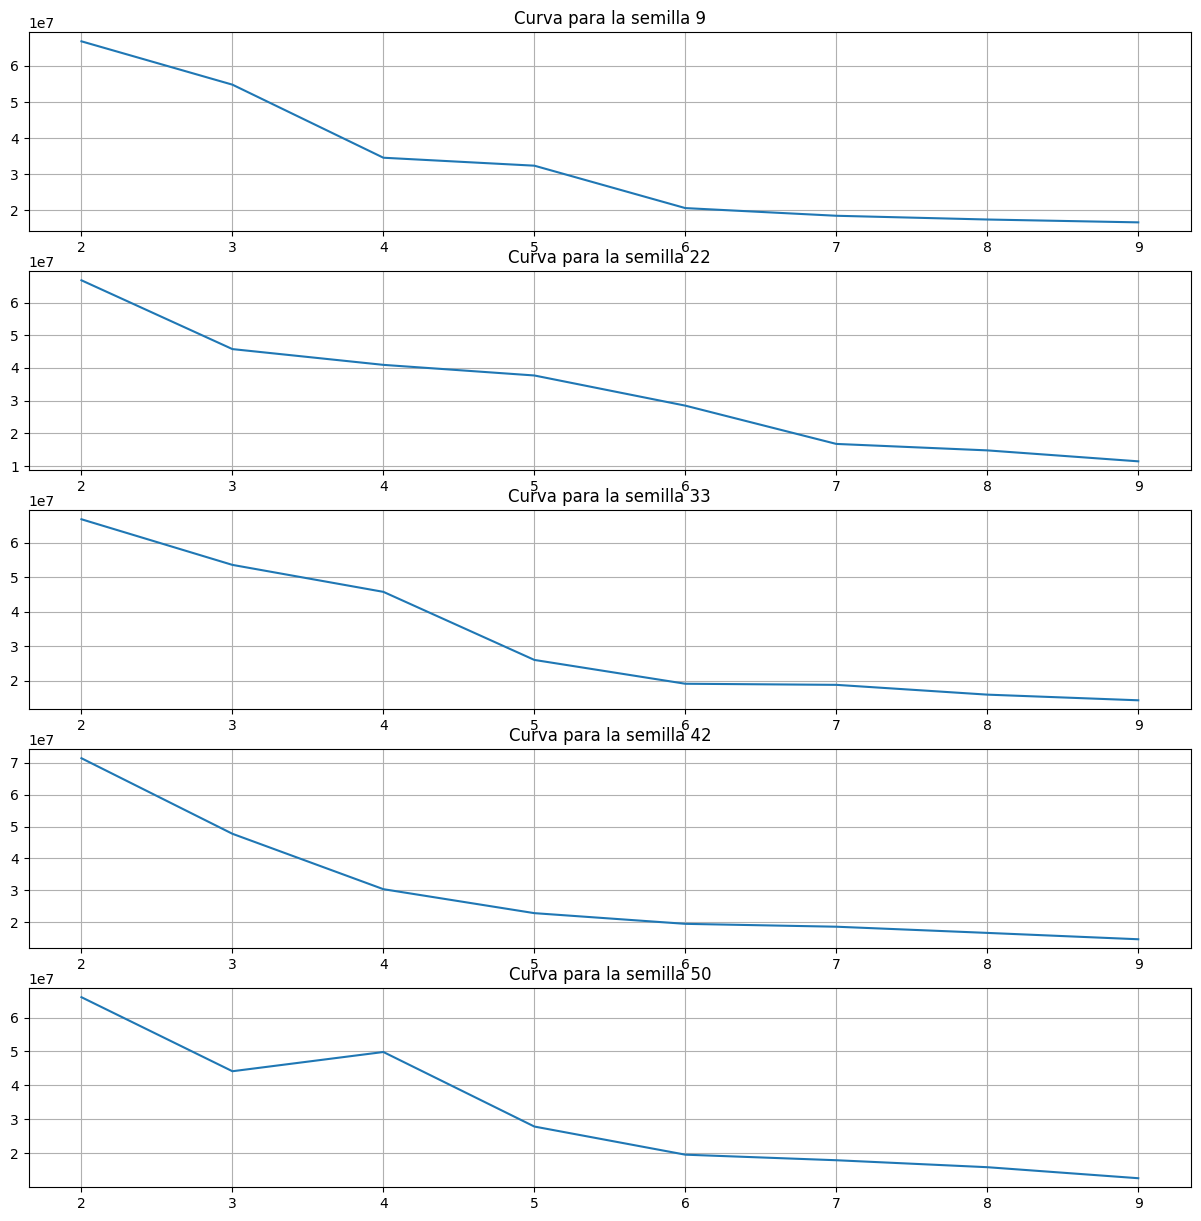

In [ ]:
fig = plt.figure(figsize=(15, 15))

for i, sem in enumerate(candidatos):
    ax = plt.subplot(len(candidatos), 1, i + 1)
    plt.plot(grupos, distorsions[sem])
    plt.grid(True)
    plt.title(f'Curva para la semilla {sem}')
plt.show()

Vamos a dibujar una representación visual de los datos, para ver como nuestros algoritmo de K-means está realizando la agrupación.

In [ ]:
def plot_model(k, semilla):
    model = KMeans(n_clusters=k,random_state=semilla, init='random', n_init=1)
    model.fit(X_trans)
    label = model.labels_

    pca = IncrementalPCA(n_components=2, whiten=True)
    x_plot = pca.fit_transform(X_trans)
    
    colors = ['gold','red','blue','green','orange']
    colors = dict(zip(range(k), colors))

    plt.scatter(x=x_plot[:,0], y=x_plot[:,1], c=[colors.get(x) for x in label])
    plt.title(f'Grupos para la semilla {semilla} con k={k}')


Con los candidatos que seleccionamos con la gráfica anterior, vamos a realizar una agrupación de cada uno de ellos para ver que tanto difieren nuestros modelos.

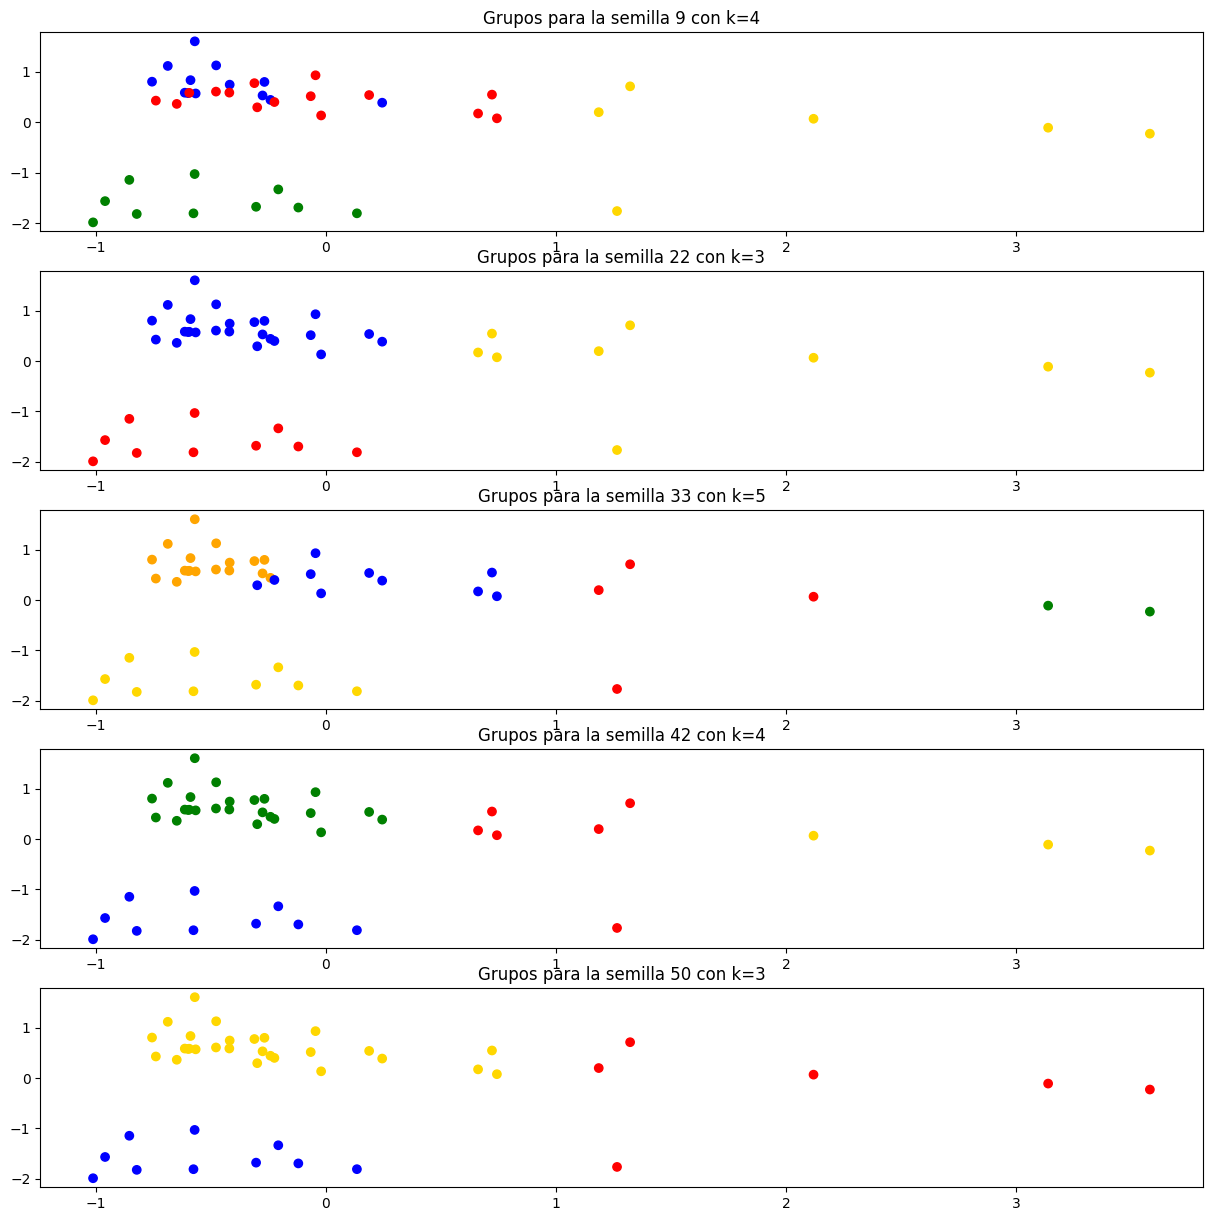

In [ ]:
valores = [(9,4),
           (22,3),
           (33,5),
           (42,4),
           (50,3)
           ]

fig = plt.figure(figsize=(15, 15))

for i, valor in enumerate(valores):
    semilla, k = valor
    ax = plt.subplot(len(valores), 1, i + 1)
    plot_model(k, semilla)
    
plt.show()

### Validación

Y ya con nuestros candidatos seleccionados, podemos ver el coeficiente de silueta de cada uno de los grupos.

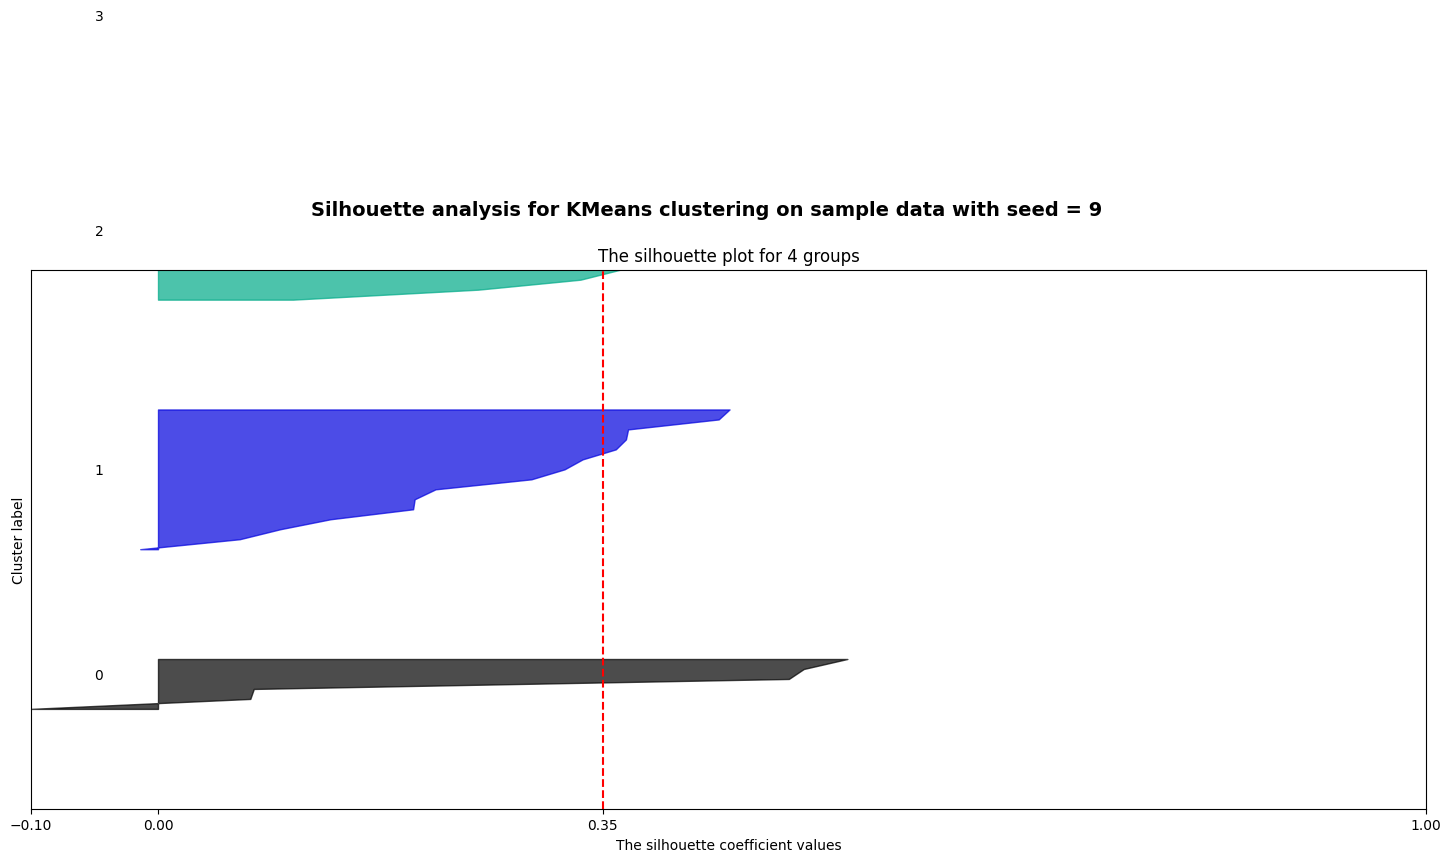

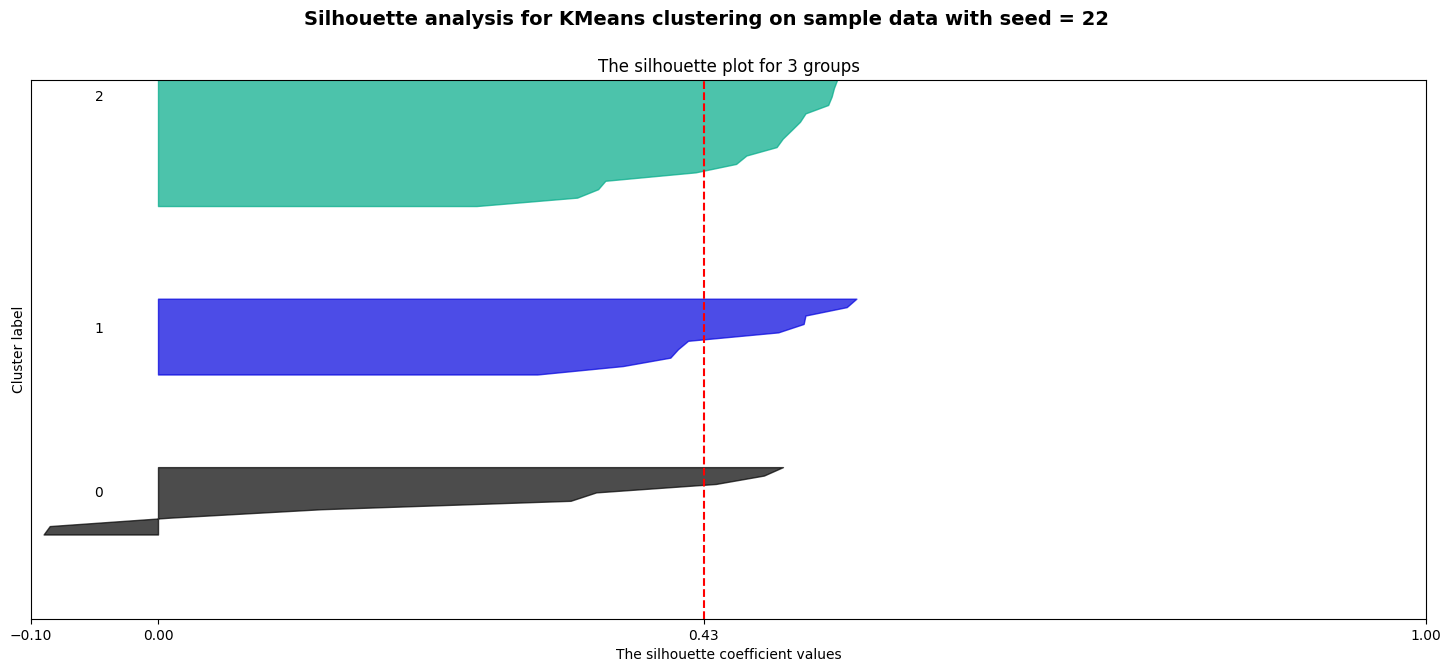

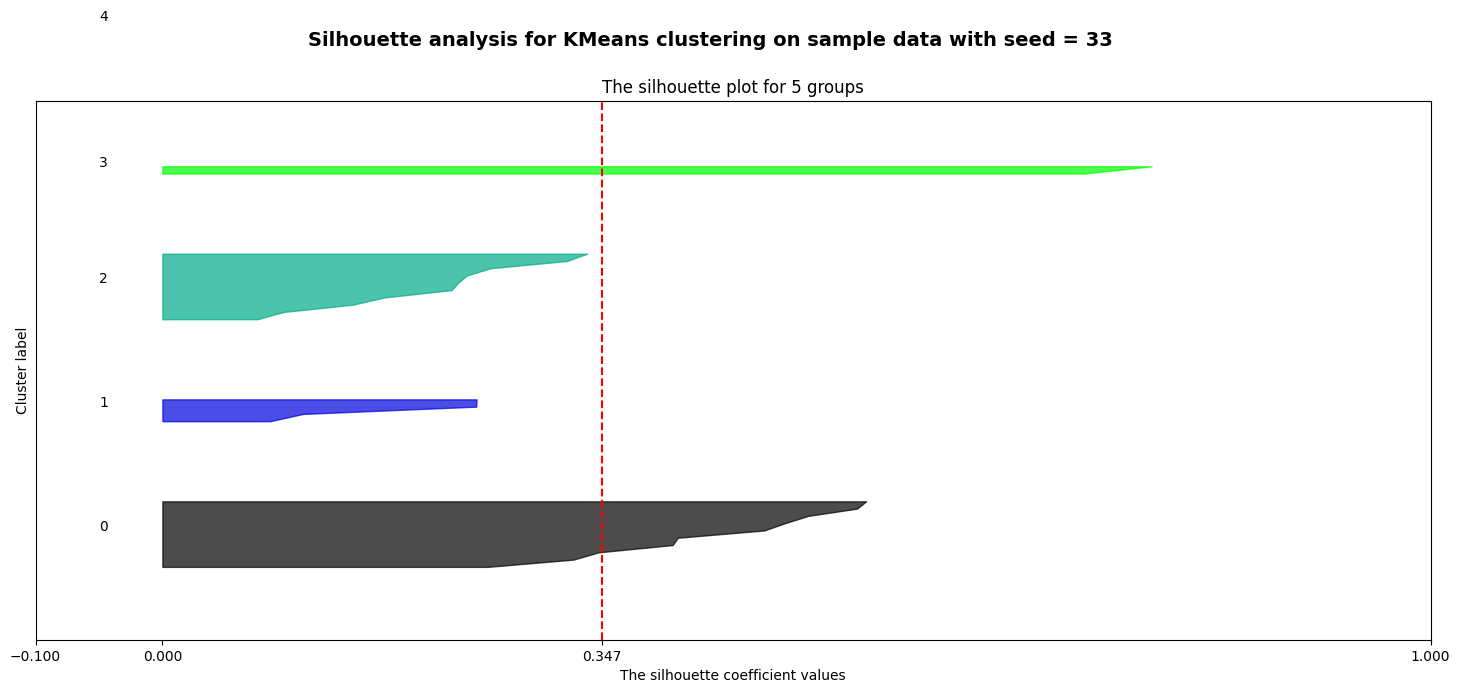

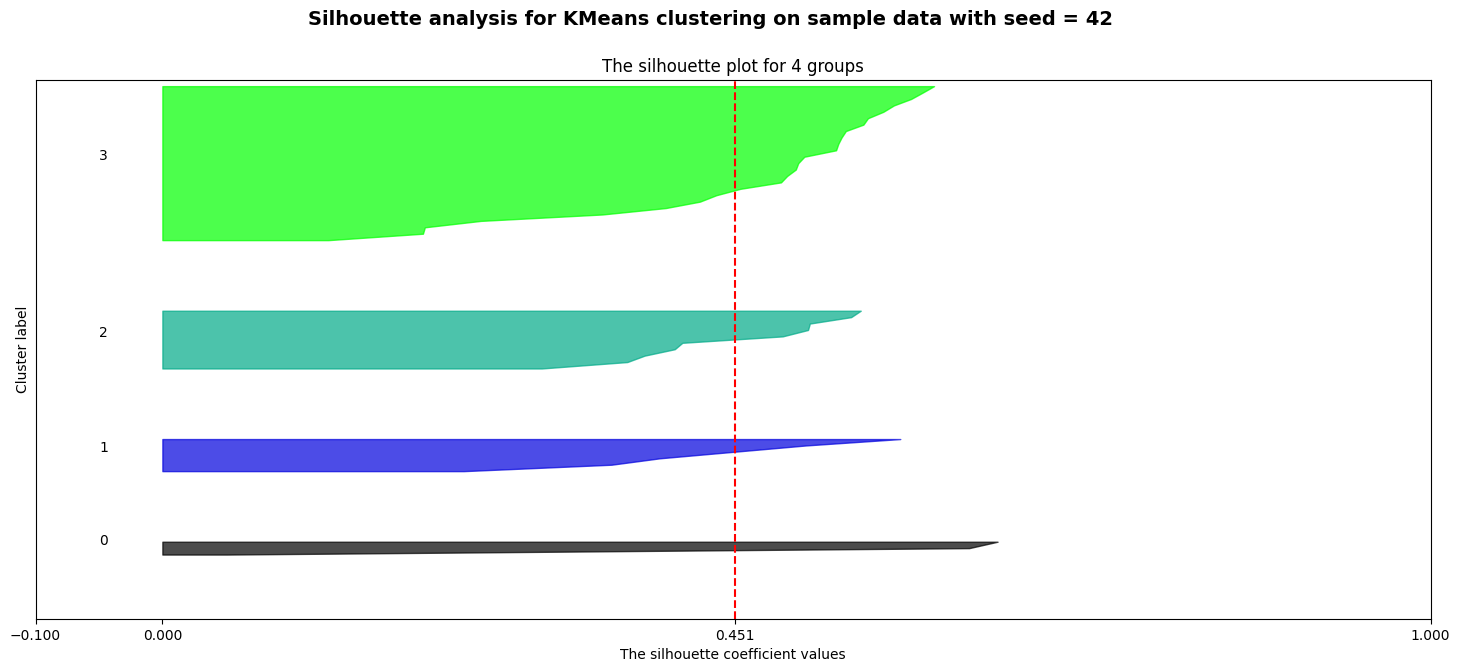

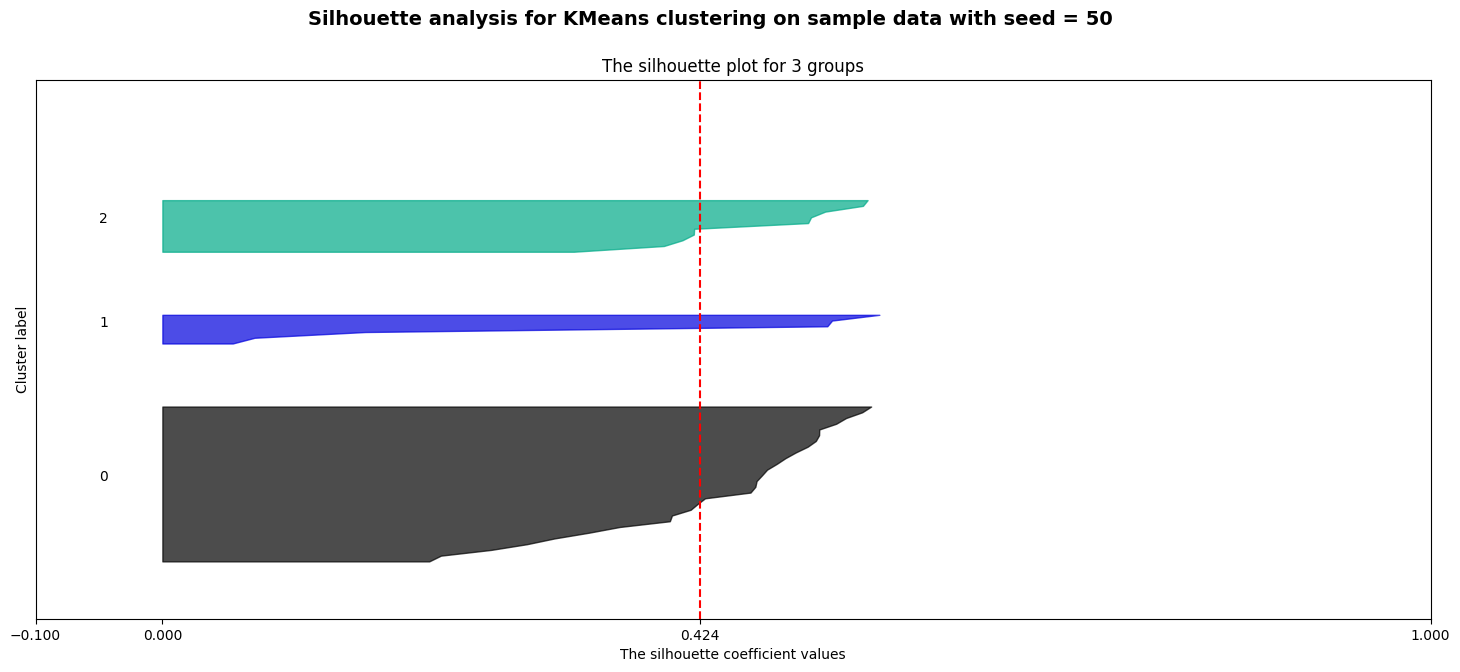

In [ ]:
for n, valor in enumerate(valores):
    semilla, k = valor
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 0.2])
    ax1.set_ylim([0, len(X_trans) + (n + 1) * 10])

    clusterer = KMeans(n_clusters=k, random_state=semilla, init='random', n_init=1)
    cluster_labels = clusterer.fit_predict(X_trans)


    silhouette_avg = silhouette_score(X_trans, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_trans, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 5)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for {k} groups")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, silhouette_avg, 1.0])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with seed = %d"
        % semilla,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Con el mejor modelo seleccionado gracias al coeficiente de silueta, realizamos el entrenamiento de nuestro modelo final.

In [113]:
k = 4
semilla = 42

final_model = KMeans(n_clusters=k, random_state=semilla, init='random', n_init=1)
final_model.fit(X_trans)

KMeans(init='random', n_clusters=4, n_init=1, random_state=42)

Y con nuestro modelos final, podemos determinar los centroides seleccionados por cada grupo

In [114]:
clusters = final_model.cluster_centers_

info_clusters = pd.DataFrame(clusters, index=[f"Grupo {i+1}" for i in range(k)], columns=X_trans.columns).transpose()
info_clusters

,Grupo 1,Grupo 2,Grupo 3,Grupo 4
Sunshine hours(City),1724.000000,2285.666667,2507.000,2104.6400
Cost of a bottle of water(City),1.290000,0.968333,0.377,1.5272
Obesity levels(Country),17.900000,24.816667,13.420,25.1160
Life expectancy(years) (Country),81.800000,78.216667,71.440,80.4240
Pollution(Index score) (City),55.616667,63.305000,72.969,36.8756
Annual avg. hours worked,1562.333333,1472.333333,0.000,1667.4000
Happiness levels(Country),6.563333,6.338333,5.064,6.9912
Outdoor activities(City),383.666667,291.666667,218.300,173.2400
Number of take out places(City),5527.333333,2812.166667,857.000,858.8800
Cost of a monthly gym membership(City),49.820000,39.660000,34.550,41.8224


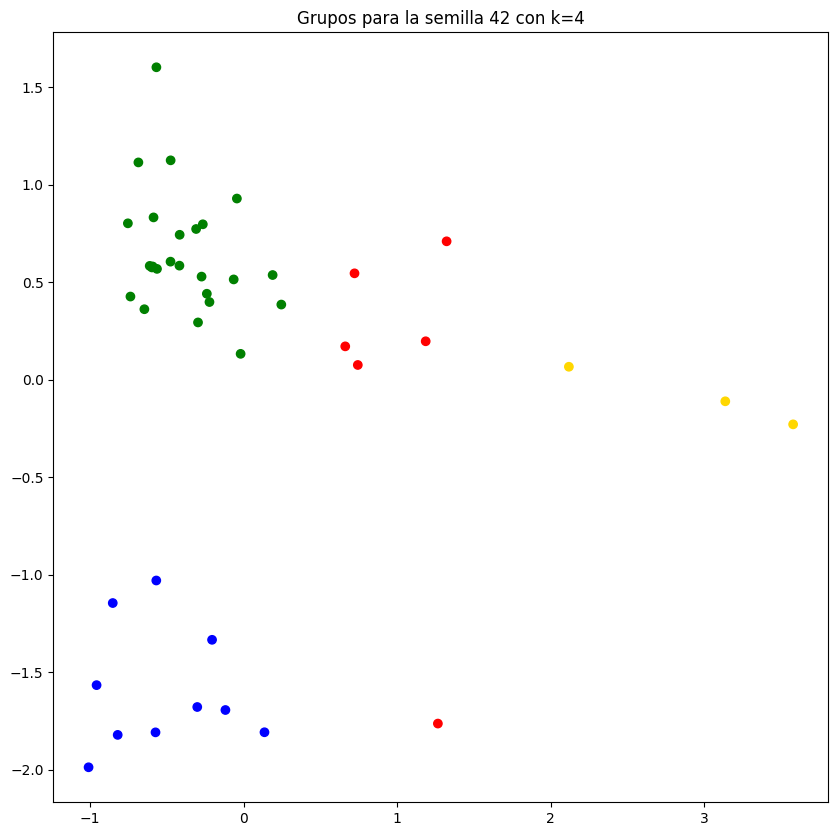

In [115]:
fig = plt.figure(figsize=(10, 10))
plot_model(k, semilla)
plt.show()

Y así, le podemos asignar a cada una de nuestras ciudades el grupo correspondiente.

In [116]:
datos['Grupo'] = [f"Grupo {i+1}" for i in final_model.labels_]

datos

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Grupo
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90,Grupo 4
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66,Grupo 4
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74,Grupo 4
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31,Grupo 4
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53,Grupo 4
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23,Grupo 4
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87,Grupo 4
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11,Grupo 4
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80,Grupo 2
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04,Grupo 4


Realizamos un conteo para ver la asignación de nuestros grupos.

In [117]:
display(datos['Grupo'].value_counts())

Grupo 4    25
Grupo 3    10
Grupo 2     6
Grupo 1     3
Name: Grupo, dtype: int64

Y realizamos un filtro para determinar las características de cada modelos y las ciudades a las que pertenecen cada grupo.

In [118]:
grupo = 'Grupo 1'

display(info_clusters[grupo])

datos[datos['Grupo'] == grupo]

Sunshine hours(City)                      1724.000000
Cost of a bottle of water(City)              1.290000
Obesity levels(Country)                     17.900000
Life expectancy(years) (Country)            81.800000
Pollution(Index score) (City)               55.616667
Annual avg. hours worked                  1562.333333
Happiness levels(Country)                    6.563333
Outdoor activities(City)                   383.666667
Number of take out places(City)           5527.333333
Cost of a monthly gym membership(City)      49.820000
Name: Grupo 1, dtype: float64

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Grupo
28,Tokyo,29,1877,£0.76,4.30%,83.2,42.84,1644,5.87,387,5802,£70.82,Grupo 1
34,Paris,35,1662,£1.95,21.60%,81.8,65.10,1505,6.66,331,4363,£35.93,Grupo 1
37,London,38,1633,£1.16,27.80%,80.4,58.91,1538,7.16,433,6417,£42.71,Grupo 1


In [119]:
grupo = 'Grupo 2'

display(info_clusters[grupo])

datos[datos['Grupo'] == grupo]

Sunshine hours(City)                      2285.666667
Cost of a bottle of water(City)              0.968333
Obesity levels(Country)                     24.816667
Life expectancy(years) (Country)            78.216667
Pollution(Index score) (City)               63.305000
Annual avg. hours worked                  1472.333333
Happiness levels(Country)                    6.338333
Outdoor activities(City)                   291.666667
Number of take out places(City)           2812.166667
Cost of a monthly gym membership(City)      39.660000
Name: Grupo 2, dtype: float64

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Grupo
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80,Grupo 2
15,Madrid,16,2769,£1.30,23.80%,82.2,52.68,1686,6.40,216,2491,£34.54,Grupo 2
35,Sao Paulo,36,2003,£0.44,22.10%,73.9,79.78,-,6.37,158,3355,£16.07,Grupo 2
39,Milan,40,1915,£1.15,19.90%,82.7,67.19,1718,6.38,110,2396,£53.49,Grupo 2
41,New York,42,2535,£1.32,36.20%,78.8,57.36,1779,6.94,359,3081,£64.66,Grupo 2
42,Moscow,43,1901,£0.41,23.10%,69.5,57.63,1965,5.54,322,3206,£31.40,Grupo 2


In [120]:
grupo = 'Grupo 3'

display(info_clusters[grupo])

datos[datos['Grupo'] == grupo]

Sunshine hours(City)                      2507.000
Cost of a bottle of water(City)              0.377
Obesity levels(Country)                     13.420
Life expectancy(years) (Country)            71.440
Pollution(Index score) (City)               72.969
Annual avg. hours worked                     0.000
Happiness levels(Country)                    5.064
Outdoor activities(City)                   218.300
Number of take out places(City)            857.000
Cost of a monthly gym membership(City)      34.550
Name: Grupo 3, dtype: float64

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Grupo
11,Beijing,12,2671,£0.26,6.20%,75.4,85.43,-,5.12,223,261,£38.62,Grupo 3
12,Bangkok,13,2624,£0.22,10.00%,74.1,76.64,-,5.99,377,1796,£50.03,Grupo 3
13,Buenos Aires,14,2525,£0.57,28.30%,75.9,52.64,-,5.97,246,1435,£22.45,Grupo 3
16,Jakarta,17,2983,£0.21,6.90%,68.5,84.39,-,5.28,114,833,£29.94,Grupo 3
22,Cairo,23,3542,£0.16,32.00%,70.7,91.74,-,4.15,323,250,£23.25,Grupo 3
23,Taipei,24,1405,£0.57,6.20%,75.4,49.32,-,5.12,134,717,£34.76,Grupo 3
25,Mumbai,26,2584,£0.15,3.90%,67.3,82.84,-,3.57,187,1183,£19.54,Grupo 3
30,Hong Kong,31,1836,£0.75,6.20%,75.4,67.46,-,5.51,277,1257,£57.95,Grupo 3
31,Shanghai,32,1776,£0.29,6.20%,75.4,77.40,-,5.12,108,346,£44.68,Grupo 3
38,Johannesburg,39,3124,£0.59,28.30%,56.3,61.83,-,4.81,194,492,£24.28,Grupo 3


In [121]:
grupo = 'Grupo 4'

display(info_clusters[grupo])

datos[datos['Grupo'] == grupo]

Sunshine hours(City)                      2104.6400
Cost of a bottle of water(City)              1.5272
Obesity levels(Country)                     25.1160
Life expectancy(years) (Country)            80.4240
Pollution(Index score) (City)               36.8756
Annual avg. hours worked                  1667.4000
Happiness levels(Country)                    6.9912
Outdoor activities(City)                   173.2400
Number of take out places(City)            858.8800
Cost of a monthly gym membership(City)      41.8224
Name: Grupo 4, dtype: float64

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Grupo
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90,Grupo 4
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66,Grupo 4
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74,Grupo 4
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31,Grupo 4
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53,Grupo 4
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23,Grupo 4
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87,Grupo 4
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11,Grupo 4
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04,Grupo 4
10,Melbourne,11,2363,£1.57,29.00%,82.1,25.90,1712,7.22,243,813,£36.89,Grupo 4


Y adicionalmente, podemos ver un comparativo de varias características según los grupos evaluados.

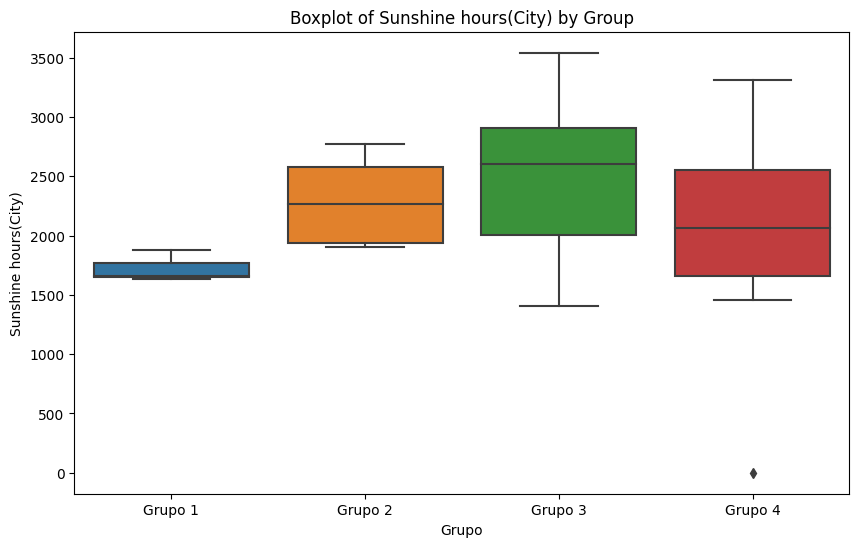

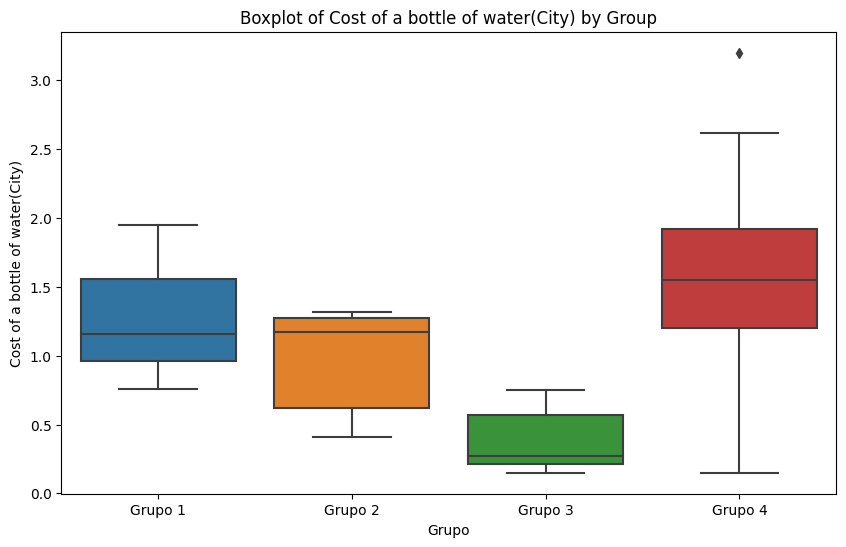

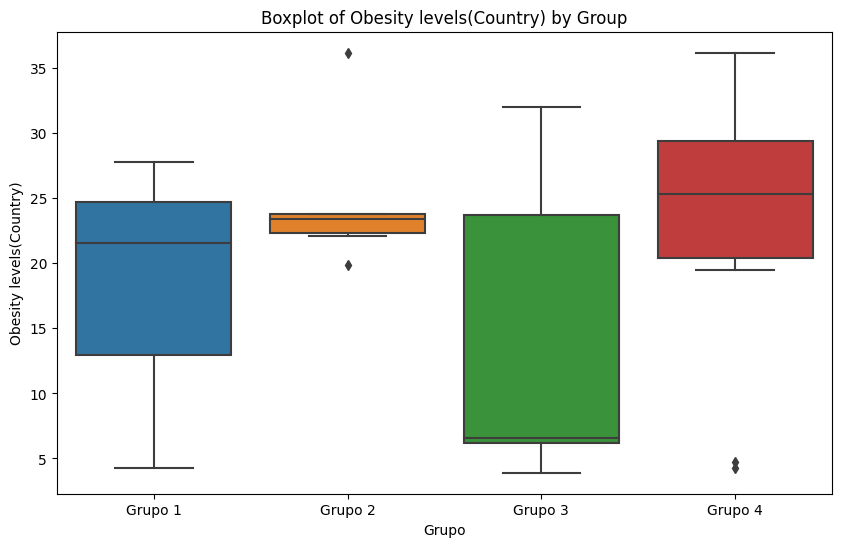

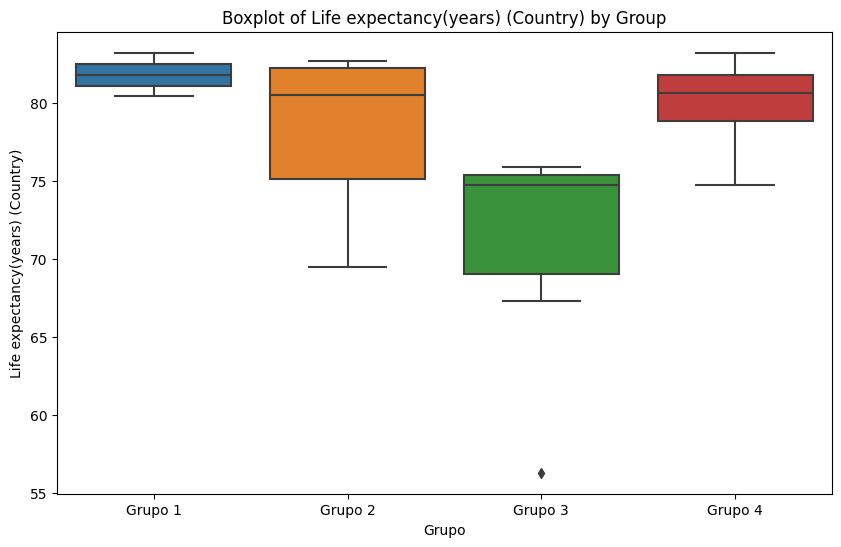

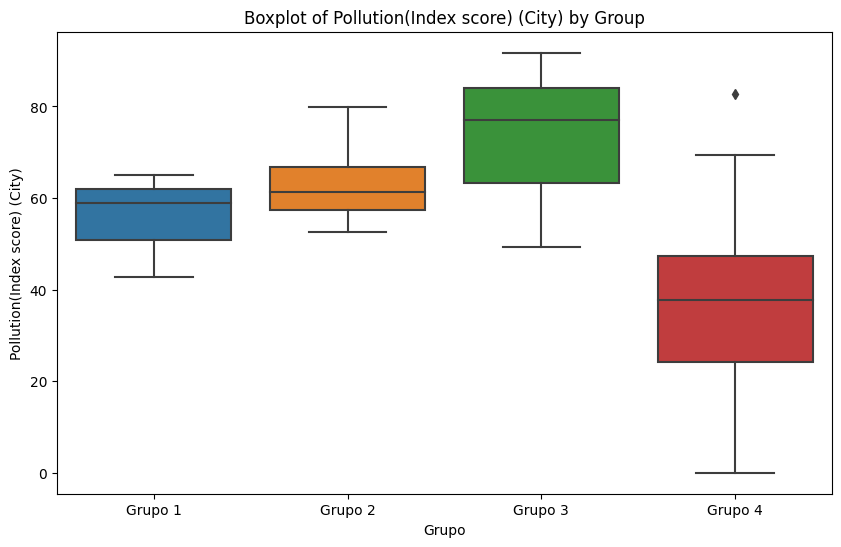

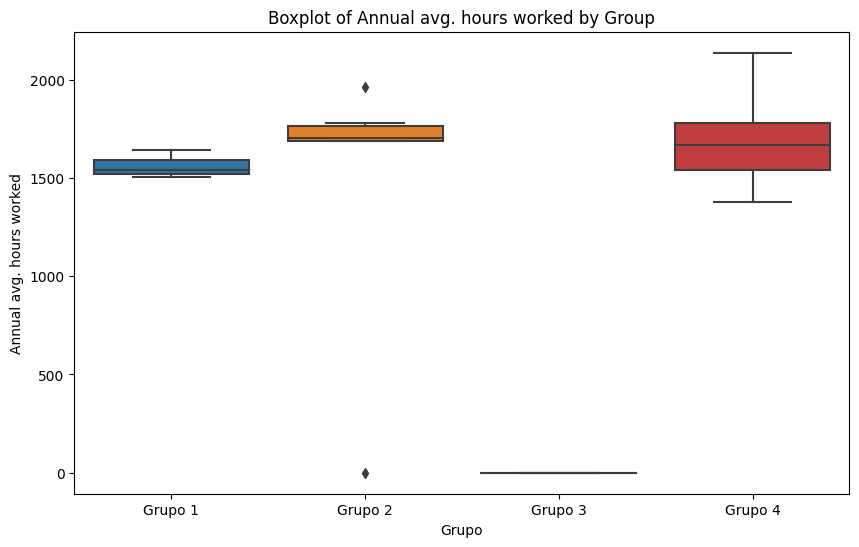

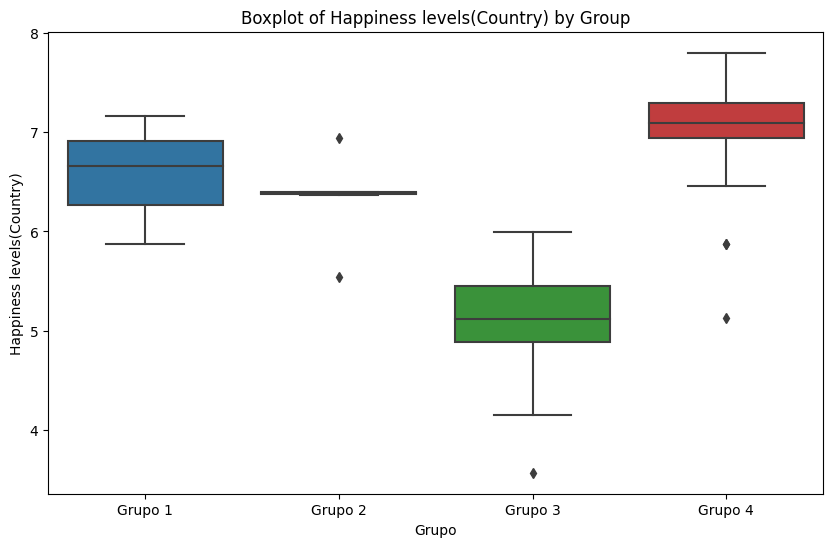

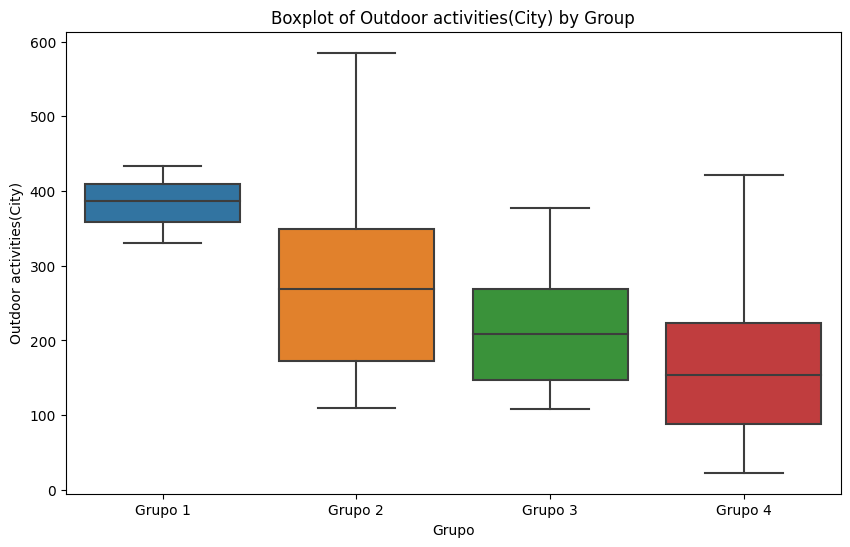

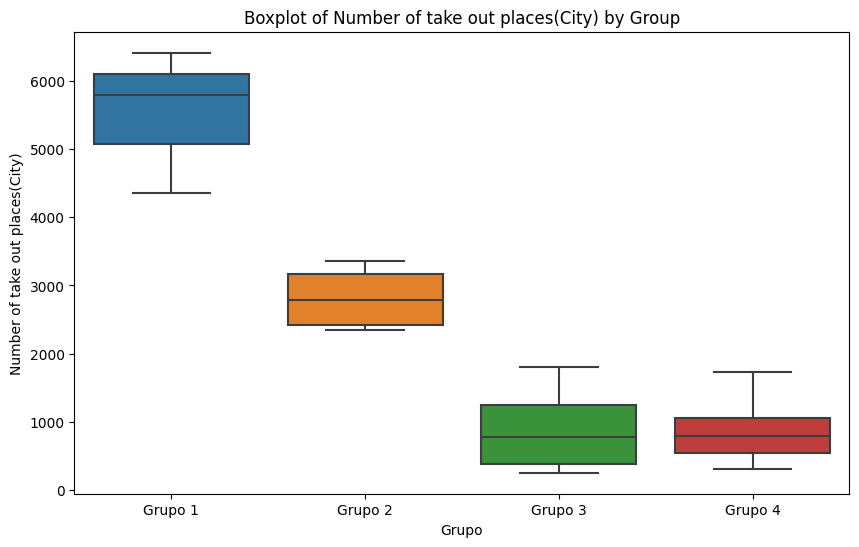

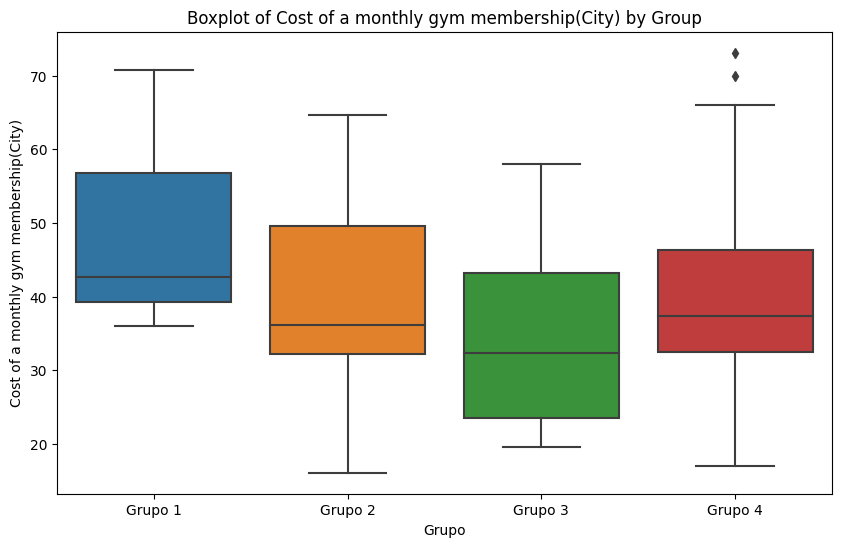

In [122]:
columns = X_trans.columns
df_temp = X_trans.copy()
df_temp['Grupo'] = datos['Grupo']

for column in columns:
    df_temp[column] = pd.to_numeric(df_temp[column], errors='coerce')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Grupo', y=column, data=df_temp, order=['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4'])
    plt.title(f'Boxplot of {column} by Group')
    plt.show()